# Draw figures changing $N$ and $M$

$$
N \leq \frac{M}{\left(1 + \frac{\sigma^2_P}{\mu_R^2\sigma_C^2}\right)\left(1 + \frac{\sigma^2_Y}{\mu_Y^2} 
+ \frac{\sigma^2_Y\mu_C^2}{\sigma^2_C\mu_Y^2} + \frac{2M\sigma^2_H\mu_R^2}{\sigma^2_C\mu_Y^2}\right)},
$$
and
$$
N \geq M \left(1 + \frac{\sigma^2_P}{\mu_R^2\sigma_C^2}\right)\left(1 + \frac{\sigma^2_Y}{\mu_Y^2} 
+ \frac{\sigma^2_Y\mu_C^2}{\sigma^2_C\mu_Y^2} + \frac{2M\sigma^2_H\mu_R^2}{\sigma^2_C\mu_Y^2}\right).
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def N1(M, 
       sigP, 
       sigY, 
       sigH,
       muR = 0.5,
       muC = 0.5, 
       sigC = 1/np.sqrt(12),
       muY = 0.5):
    # function to calculate upper bound of the first stable phase
    return M/(1 + sigP**2/muR**2/sigC**2)/(1 + sigY**2/muY**2 + sigY**2*muC**2/muY**2/sigC**2 + 2*M*sigH**2*muR**2/sigC**2/muY**2)

def N2(M, 
       sigP, 
       sigY, 
       sigH,
       muR = 0.5,
       muC = 0.5, 
       sigC = 1/np.sqrt(12),
       muY = 0.5):
    # function to calculate lower bound of the second stable phase
    return M * (1 + sigP**2/muR**2/sigC**2) * (1 + sigY**2/muY**2 + sigY**2*muC**2/muY**2/sigC**2 + 2*M*sigH**2*muR**2/sigC**2/muY**2)

In [3]:
# only sigY

M_span = np.arange(1,46,1)
N1_span = N1(M_span,0,0.15,0.02)
N2_span = N2(M_span,0,0.15,0.02)

In [4]:
def sample(N:int,
           M:int,
           sigP,
           sigY,
           sigH):
    
       C = np.random.rand(N, M) # 
       muC = 0.5 
       sigC = 1/np.sqrt(12)
       muY = 0.5
       Y = np.random.randn(N, M) * sigY + muY
       H = np.random.randn(N, M, M) * sigH
       P = np.random.rand(N, M) * sigP * np.sqrt(12)
       
       Ss = 0.01 + 0.99*np.random.rand(N)
       Rs = 0.01 + 0.99*np.random.rand(M) #muR = 0.5
       l = 0.1 + 0.9*np.random.rand(M)
       muR = 0.5

       Js = np.zeros((N+M,N+M))
       Js[0:N,N:N+M] = np.diag(Ss) @ (C*Y + np.tensordot(Rs,H, axes=([0],[1])) + np.tensordot(H,Rs, axes=([2],[0])))
       Js[N:N+M,0:N] = P.T - np.diag(Rs) @ C.T
       Js[N:N+M,N:N+M] = - np.diag(C.T @ Ss) - np.diag(l)

       E_J = np.linalg.eigvals(Js)
       E_Jr = E_J.real
       NU_J = len(E_Jr[E_Jr >= 1.0e-6]) # if devided by Nr or Ns

       rho = np.sqrt(1/(1 + sigP**2/muR**2/sigC**2)/(1 + sigY**2/muY**2 + sigY**2*muC**2/muY**2/sigC**2 + 2*M*sigH**2*muR**2/sigC**2/muY**2))

       return NU_J, rho

In [5]:
M_span1 = range(4,46,4)
N_span = range(4,80,4)
NU = np.zeros((len(M_span1), len(N_span), 10))
for iM in range(len(M_span1)):
    for iN in range(len(N_span)):
        for i in range(10):
            NU[iM, iN, i], _ = sample(N_span[iN], M_span1[iM], 0,0.15,0.02)

FU = np.mean((NU > 0).astype(float), -1)

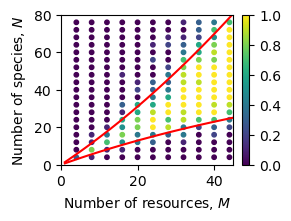

In [6]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
plt.plot(M_span, N1_span, 'r')
plt.plot(M_span, N2_span, 'r')
plt.scatter(np.array(M_span1) * np.ones((len(N_span),1)), np.array(N_span).reshape(-1, 1) * np.ones((1,len(M_span1))), c = FU.T, s = 10)
plt.colorbar()
#plt.plot(M_span, M_span, 'k--')
plt.xlim(0,45)
plt.ylim(0,80)
plt.xlabel('Number of resources, $M$')
plt.ylabel('Number of species, $N$')
plt.savefig('../figures/fig2-test10.pdf')